In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 225


In [4]:
path = Path('/home/mreishus/screenshots')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

In [5]:
data.classes

['7th-saga',
 '90-minutes-european-prime-goal',
 'acrobat-mission',
 'actraiser',
 'actraiser-2',
 'aero-fighters',
 'aero-the-acro-bat',
 'aero-the-acro-bat-2',
 'al-unser-jr-s-road-to-the-top',
 'aladdin',
 'alcahest',
 'alien-vs-predator',
 'american-battle-dome',
 'animaniacs',
 'apocalypse-ii',
 'ardy-lightfoot',
 'area-88',
 'arkanoid-doh-it-again',
 'art-of-fighting',
 'art-of-fighting-2',
 'ashita-no-joe',
 'asterix',
 'asterix-obelix',
 'axelay',
 'b-o-b',
 'bakukyuu-renpatsu-super-b-daman',
 'ballz-3d',
 'barbie-super-model',
 'batman-forever',
 'batman-returns',
 'battle-blaze',
 'battle-cars',
 'battle-cross',
 'battle-grand-prix',
 'battle-master-kyuukyoku-no-senshitachi',
 'battle-pinball',
 'battle-racers',
 'battle-tycoon-flash-hiders-sfx',
 'battle-zeque-den',
 'battletoads-double-dragon-the-ultimate-team',
 'battletoads-in-battlemaniacs',
 'beauty-and-the-beast',
 'beavis-and-butt-head',
 'bebe-s-kids',
 'beethoven-s-2nd',
 'best-of-the-best-championship-karate',
 'bi

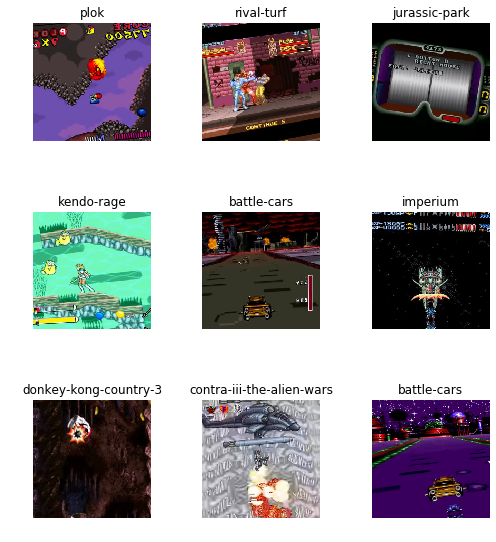

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.567896,2.036041,0.378188,04:05
1,1.530429,0.903802,0.181417,04:03
2,1.078492,0.701768,0.140758,04:02
3,0.924897,0.660500,0.132257,04:02


In [9]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.025859,0.659779,0.136540,04:04
1,0.840208,0.575808,0.119143,04:01


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

In [ ]:
interp.most_confused(min_val=5)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


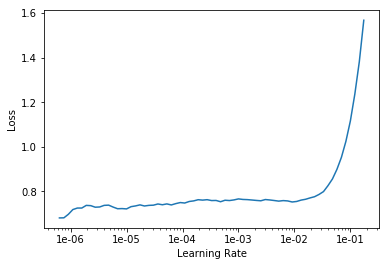

In [11]:
learn.recorder.plot()

In [12]:
learn.save('stage-1')

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(3, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.729954,0.500156,0.104448,04:09
1,0.495974,0.373210,0.075387,04:07
2,0.310697,0.328568,0.065173,04:06


In [15]:
learn.save('stage-2')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

[('super-mario-all-stars-super-mario-bros',
  'super-mario-all-stars-super-mario-bros-the-lost-levels',
  12),
 ('donkey-kong-country', 'super-donkey-kong', 7),
 ('super-mario-all-stars-super-mario-bros-the-lost-levels',
  'super-mario-all-stars-super-mario-bros',
  6),
 ('mega-man-x3', 'mega-man-x2', 5)]

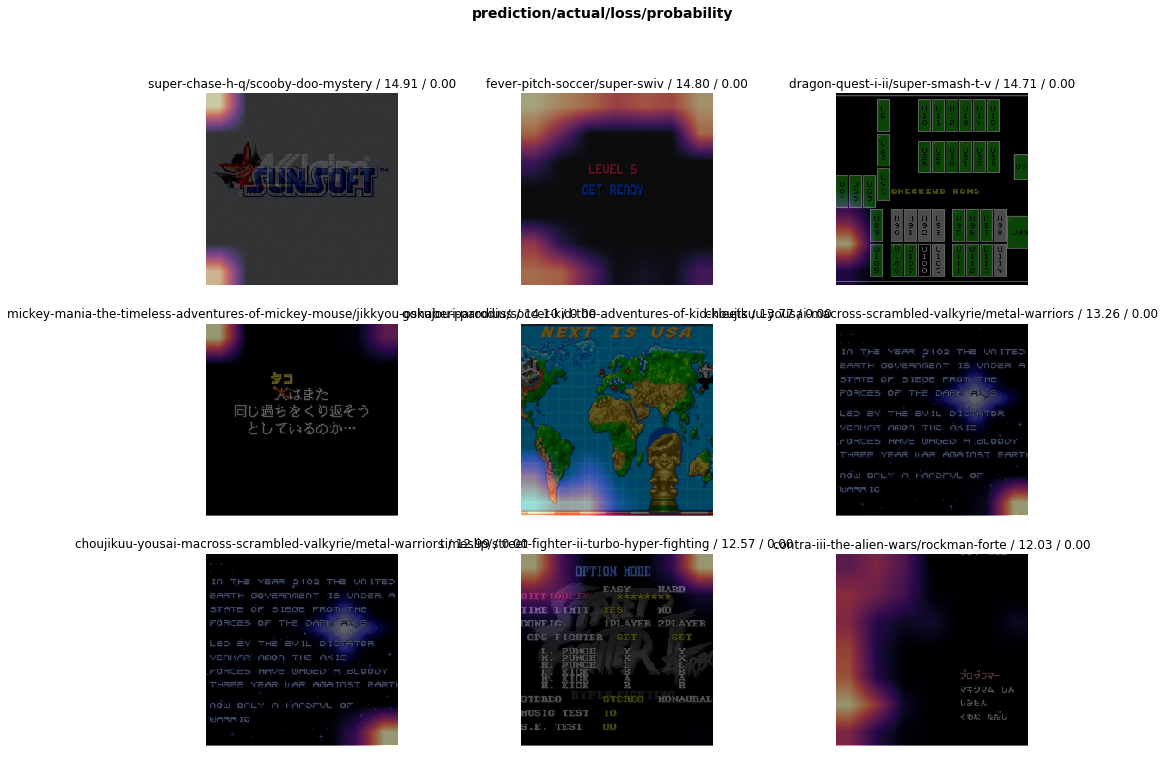

In [17]:
interp.plot_top_losses(9, figsize=(16,12))

In [18]:
learn.export()

In [19]:
learn.fit_one_cycle(1, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.286121,0.323293,0.063591,04:06


In [20]:
learn.save('stage-3')

In [21]:
learn.export()